### Exercise

We will analyze the similarities between different mouses using the euclidean distance

In [2]:
import numpy as np

In [8]:
weight = np.random.uniform(5, 15, (50, 10)) # gr
size = np.random.uniform(5, 20, (50, 10)) # cm
speed = np.random.randint(1, 5, (50, 10)) # m/s  

Euclidean distance

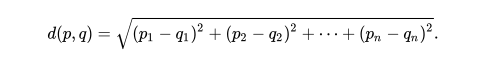


So a single mouse if defined by its weight, size and speed and their evolution in time. We have 10 mice and 50 measurements in time.

In [11]:
def np_normalize_var(var):
    var_normed = (var - np.mean(var)) / np.std(var)

    return var_normed

In [22]:
weight_normed = np_normalize_var(weight)
size_normed = np_normalize_var(size)
speed_normed = np_normalize_var(speed)

### Comparison of M1 with M2

In [26]:
d = np.sqrt((weight_normed[:, 0] - weight_normed[:, 1])**2 + 
            (size_normed[:, 0] - size_normed[:, 1])**2 +
            (speed_normed[:, 0] - speed_normed[:, 1])**2)
d

array([1.0732668 , 1.99810538, 2.99723068, 2.11849686, 2.09035024,
       2.1702486 , 2.5583806 , 1.87460492, 2.90646417, 3.27042974,
       1.94356312, 3.11662298, 1.95509689, 3.05289279, 2.67457492,
       1.98574121, 1.77538931, 2.53073659, 2.22696904, 2.33061125,
       1.64217803, 3.6798199 , 2.78914259, 2.53161656, 3.40591097,
       2.39963944, 1.70943978, 3.12031267, 3.19399039, 3.6254302 ,
       2.73527243, 2.6636074 , 3.31793604, 2.18744038, 2.36071979,
       2.93550908, 2.065443  , 1.32750051, 2.22451639, 2.28603377,
       1.2189191 , 2.29971404, 2.47751645, 3.47854975, 3.01573271,
       2.70217319, 2.67941981, 1.48121391, 1.79681591, 1.13592686])

### Comparison of M1 with the rest of the mice

In [39]:
weight_normed[:, 0].shape # the first column is an array of 50 values without (row, column) structure

(50,)

In [42]:
# Reshape the array to (50, 1)
weight_normed[:, 0][:, np.newaxis].shape

(50, 1)

In [44]:
np.reshape(weight_normed[:, 0], (50, 1)).shape

(50, 1)

In [76]:
(weight_normed[:, 0][:, np.newaxis] - weight_normed[:, 1:]).shape

(50, 9)

In [ ]:
dm1 = np.sqrt((weight_normed[:, 0][:, np.newaxis] - weight_normed[:, 1])**2 + 
            (size_normed[:, 0][:, np.newaxis] - size_normed[:, 1])**2 +
            (speed_normed[:, 0][:, np.newaxis] - speed_normed[:, 1])**2)
dm1

#### Plot 3,2 plots of weights, sizes, and speed of the mice

1st row - raw data

2nd row - normalized data

In [57]:
import matplotlib.pyplot as plt

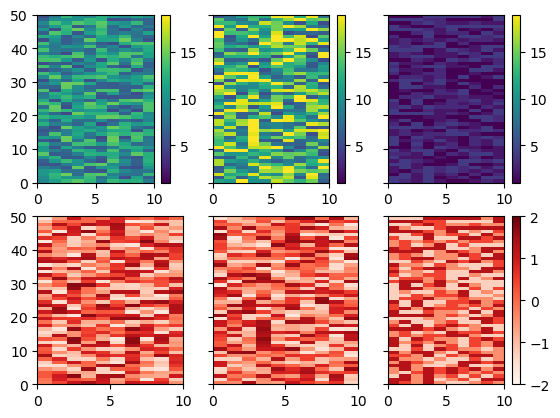

In [75]:
fig, axs = plt.subplots(2, 3, sharey='row')

# raw data
for ii, var in enumerate([weight, size, speed]):
    p = axs[0, ii].pcolormesh(var, vmin=1, vmax=19)
    plt.colorbar(p)

# normalized data
for ii, var in enumerate([weight_normed, size_normed, speed_normed]):
    p = axs[1, ii].pcolormesh(var, cmap='Reds', vmin=-2, vmax=2)
plt.colorbar(p)


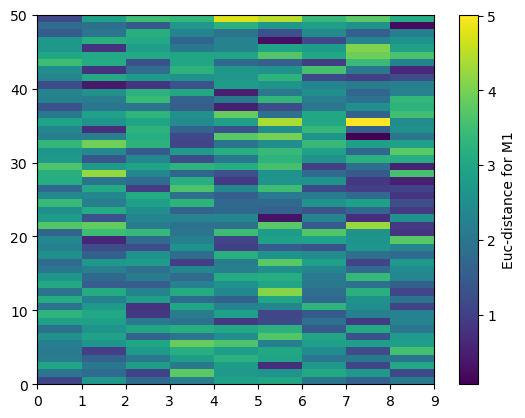

In [73]:
plt.pcolormesh(dm1)
plt.colorbar(label='Euc-distance for M1')